# The Power of Plotly: A Better Approach to Python Data Visualization

Visualization is essential to communicating results in data science. While it takes years of studying and training to understand standard deviations and cross-validation, anyone can easily comprehend a chart or graph. 

In this post, I'll compare Matplotlib, the bread-and-butter data visualization package in Python, with Plotly, an interactive one. By visualizing the same dataset with both, I'll argue that Plotly is a superior alternative. 

## The Matplotlib Version

Let's say we want to plot the locations of seismographic stations in the Himalayas. After much searching and consternation, we find a dataset at [TODO: Link to original source], which has four attributes for each station: 

1. Latitude 

2. Longitude 

3. Elevation

4. Name (stored as a 4-character code)

The most natural approach is a 2D scatterplot where each station is plotted at its longitude and latitude. We can use a colorbar to represent elevation.

In [1]:
'''Importing packages.'''
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import numpy as np
import pandas as pd
from numpy import *
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
'''A function for reading the data. Typically we would insert a header row in a pandas 
dataframe to index data properly, but for visualization purposes we'll just extract 
everything and store each attribute as a list. This is not good practice!'''

station_data = pd.read_csv('data/stations.txt', sep="\t", skiprows=1, header=None)
all_lat = station_data.iloc[:][1]
all_long = station_data.iloc[:][2]
all_elev = np.array(station_data.iloc[:][3])
all_names = station_data.iloc[:][0]

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


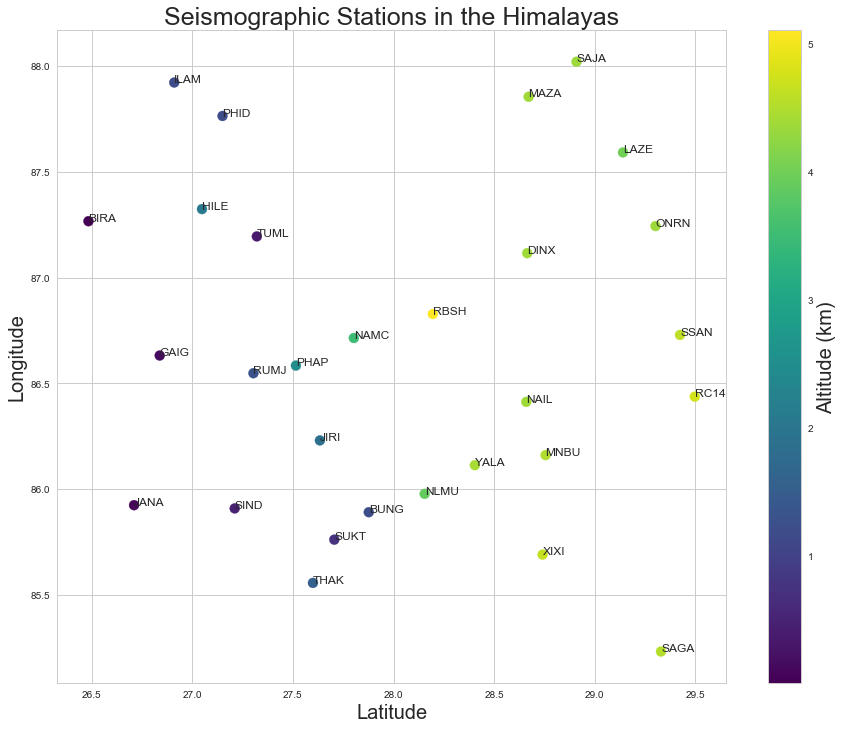

In [4]:
'''Scatter and annotate the data by station name.
Size of each scattered point is (elevation+1)*35, because otherwise the lowest-elevation dots
would be too small to be visible. This is a somewhat distorted picture, but the colormap
reflects the true elevations.'''
fig, ax = plt.subplots(figsize=[15, 12])
sc = ax.scatter(all_lat, all_long, s=100, c=all_elev, cmap = cm.viridis)
for i in range(len(all_names)):
    ax.annotate(all_names[i], (all_lat[i], all_long[i]))

'''Adding a colorbar.'''
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label('Elevation (km)', fontsize=20)

'''Labelling and saving the figure.'''
ax.set_xlabel('Latitude', fontsize=20)
ax.set_ylabel('Longitude', fontsize=20)
ax.set_title('Seismographic Stations in the Himalayas', fontsize=25)
plt.savefig('2D_matplotlib.png')
fig.show()

This is okay, but not great. The colorbar scheme conveys only a vague sense of the elevation of each station, since it's hard to get a sense of whether a dot is purple-blue or midnight-blue or just blue. 

## The 3D Matplotlib Version

To make the elevation of each point clearer, let's say we try a 3D plot. We'll use the same axes as before, but now add an elevation axis for each point.

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


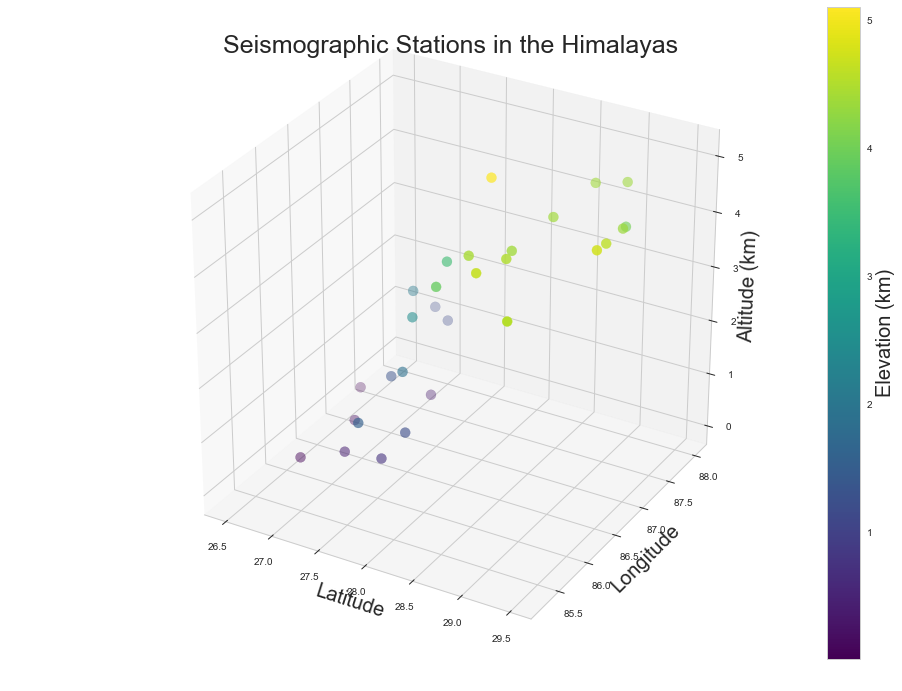

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[15, 12])
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(all_lat, all_long, all_elev, s=100, c=all_elev, cmap = cm.viridis)

for i in range(len(all_names)):
    ax.annotate(all_names[i], (all_lat[i], all_long[i]))
    
'''Adding a colorbar.'''
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label('Elevation (km)', fontsize=20)

'''Labelling and saving the figure.'''
ax.set_xlabel('Latitude', fontsize=20)
ax.set_ylabel('Longitude', fontsize=20)
ax.set_zlabel('Elevation (km)', fontsize=20)
ax.set_title('Seismographic Stations in the Himalayas', fontsize=25)
fig.show()

This does a better job of conveying the elevation of each point, but at the cost of distorting the latitude-longitude relationships of the stations. When creating a 3D plot on a 2D screen, such tradeoffs are unavoidable. 

For the sake of stubbornness, let's try some more 3D plot styles. Here's a trisurf, which "connects the dots" to create a surface in 3D space.

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


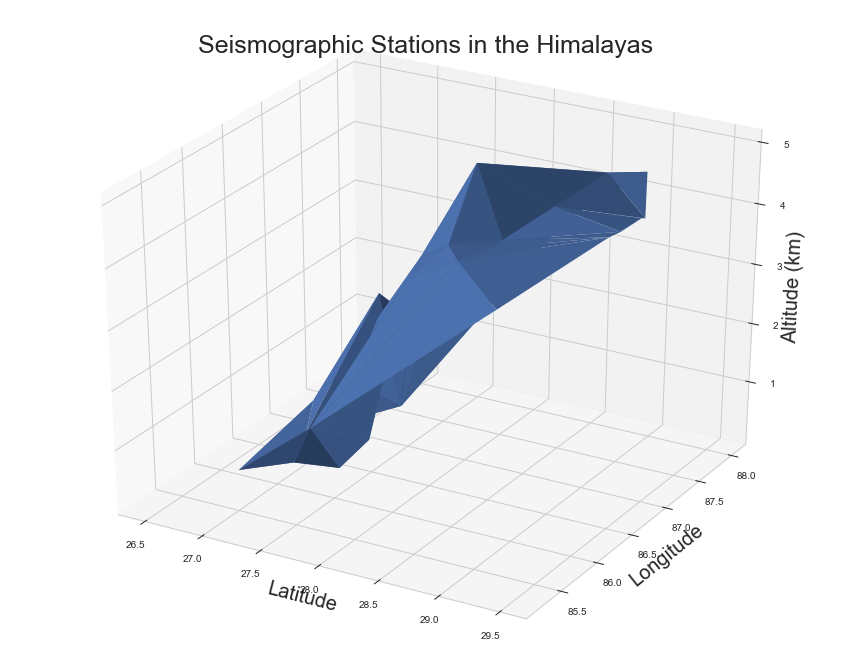

In [6]:
fig = plt.figure(figsize=[15, 12])
ax = fig.gca(projection='3d')
ax.plot_trisurf(all_lat, all_long, all_elev)

'''Labelling and saving the figure.'''
ax.set_xlabel('Latitude', fontsize=20)
ax.set_ylabel('Longitude', fontsize=20)
ax.set_zlabel('Altitude (km)', fontsize=20)
ax.set_title('Seismographic Stations in the Himalayas', fontsize=25)
fig.show()

Oof. How about a [TODO: OTHER STYLE]?

## Plotly, At Long Last

Our forays into 3D plotting don't seem to be going anywhere. Let's try returning to the original question: How do we best plot stations by latitude, longitude, and altitude? 

Our very first 2D plot got most of the way there. The only issue was that representations of altitude were not precise enough, since they were based on the colorbar gradient. 

Plotly offers an easy solution in the form of an interactive plot. We can make the exact same scatterplot as before, but this time hovering over the scatterpoint can reveal its exact altitude and name.

In [7]:
import plotly.plotly as py
import plotly.graph_objs as go

'''Construct labels for the scatterplot. This is the text that shows up when hovering
over a particular point.'''
scatter_labels = []
for a, b in zip(all_elev, all_names): 
    scatter_labels.append('Station: {}<br>Elevation: {} km '.format(b, a)) #<br> is a linebreak in Plotly
    
trace0 = go.Scatter(
    x = all_lat,
    y = all_long,
    mode = 'markers',
    name = 'markers', 
    marker=dict(
        size='16',
        color = all_elev, 
        colorscale='Viridis',
        showscale=True #[TODO: ADD TITLE TO COLORBAR]
    ),
    text = scatter_labels
)

scatter_layout = go.Layout(
    title= 'Seismographic Stations in the Himalayas',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Latitude',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Longitude',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)

fig = go.Figure(data=[trace0], layout=scatter_layout)
py.iplot(fig, filename='himalayas')

Huzzah! This plot conveys the exact same information as the original Matplotlib version, with some obvious benefits.

* Viewers can see the exact longitude, latitude, and elevation values when hovering over a point. 

* The hovering option obviates the need to plot names of stations next to the points, giving the plot a cleaner look. 

* The plot itself appears sharper and nicer looking (okay, maybe I'm biased on this one).

What about 3D?

In [8]:
import plotly.plotly as py
import plotly.graph_objs as go

'''Construct labels for the scatterplot. This is the text that shows up when hovering
over a particular point.'''
scatter_labels = []
for a, b in zip(all_elev, all_names): 
    scatter_labels.append('Station: {}<br>Elevation: {} km '.format(b, a)) #<br> is a linebreak in Plotly
    
trace0 = go.Scatter3d(
    x = all_lat,
    y = all_long,
    z = all_elev, 
    mode = 'markers',
    name = 'markers', 
    marker=dict(
        size='8',
        color = all_elev, 
        symbol='circle',
        colorscale='Viridis',
        showscale=True #[TODO: ADD TITLE TO COLORBAR]
    ),
    text = scatter_labels
)

scatter_layout = go.Layout(
    title= 'Seismographic Stations in the Himalayas',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Latitude',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Longitude',
        ticklen= 5,
        gridwidth= 2,
    ), 
#     zaxis=dict( TODO ADD Z-AXIS LABEL
#         title= 'Altitude (km)',
#         ticklen= 5,
#         gridwidth= 2,
#     ),
    showlegend= False
)

fig = go.Figure(data=[trace0], layout=scatter_layout)
py.iplot(fig, filename='himalayas-3d')



# Conclusion

For quick and easy data exploration, Matplotlib gets the job done. But when making data visualizations for others, it pays to go the extra mile and create interactive visualizations. These are the best of both worlds: you can convey more information while reducing clutter. 

Thanks for reading! If you liked this post, please share any thoughts or comments below. 

[LinkedIn](https://www.linkedin.com/in/akhil-jalan-125b32103/) [Github](https://github.com/akhiljalan)

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

'''Construct labels for the scatterplot. This is the text that shows up when hovering
over a particular point.'''
scatter_labels = []
for a, b in zip(all_elev, all_names): 
    scatter_labels.append('Station: {}<br>Elevation: {} km '.format(b, a)) #<br> is a linebreak in Plotly
    
trace0 = go.Scatter(
    x = all_lat,
    y = all_long,
    mode = 'markers',
    name = 'markers', 
    marker=dict(
        size='16',
        color = all_elev, 
        colorscale='Viridis',
        showscale=True #[TODO: ADD TITLE TO COLORBAR]
    ),
    text = scatter_labels
)

scatter_layout = go.Layout(
    title= 'Seismographic Stations in the Himalayas',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Latitude',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Longitude',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)

fig = go.Figure(data=[trace0], layout=scatter_layout)
py.iplot(fig, filename='himalayas')